<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/1107_TextAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** p516~p528
## 07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)
### 문서 군집화 개념
- 문서 군집화 (Document Clustering) : 비슷한 텍스트 구성의 문서를 군집화, 비지도학습
### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
- https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review
- Amazon.com 내 리뷰

In [ ]:
import pandas as pd
import glob, os

path = r'/content/dataa'
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합
# 개별 파일의 파일 내용은 Dataframe 로딩 후 다시 sting으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    # 절대 경로로 주어진 파일명을 가공
    # 맨 마지막 .data 확장자 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split(',')[0]
    
    # 파일명 list와 파일 내용 ㅣist에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
# 파일명 list와 파일내용 ㅣist 객체를 DataFrame 형태로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()                        

,filename,opinion_text
0,/content/dataa/mileage_honda_accord_2008.txt.data,...
1,/content/dataa/size_asus_netbook_1005ha.txt.data,...
2,/content/dataa/food_swissotel_chicago.txt.data,...
3,/content/dataa/buttons_amazon_kindle.txt.data,...
4,/content/dataa/seats_honda_accord_2008.txt.data,...


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import string
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)

# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

## 군집화 수행
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter = 10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# cluster_label 칼럼 추가
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/dataa/mileage_honda_accord_2008.txt.data,...,3
1,/content/dataa/size_asus_netbook_1005ha.txt.data,...,0
2,/content/dataa/food_swissotel_chicago.txt.data,...,1
3,/content/dataa/buttons_amazon_kindle.txt.data,...,4
4,/content/dataa/seats_honda_accord_2008.txt.data,...,3


In [ ]:
# Cluster #0 : 캔들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화됨
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
15,/content/dataa/battery-life_amazon_kindle.txt....,...,0
44,/content/dataa/battery-life_ipod_nano_8gb.txt....,...,0
6,/content/dataa/battery-life_netbook_1005ha.txt...,...,0
13,/content/dataa/eyesight-issues_amazon_kindle.t...,...,0
17,/content/dataa/keyboard_netbook_1005ha.txt.data,...,0
18,/content/dataa/performance_netbook_1005ha.txt....,...,0
31,/content/dataa/price_amazon_kindle.txt.data,...,0
35,/content/dataa/screen_ipod_nano_8gb.txt.data,...,0
23,/content/dataa/screen_netbook_1005ha.txt.data,...,0
1,/content/dataa/size_asus_netbook_1005ha.txt.data,...,0


In [ ]:
# Cluster #1 : 호텔에 대한 리뷰로 군집화됨
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
30,/content/dataa/food_holiday_inn_london.txt.data,...,1
2,/content/dataa/food_swissotel_chicago.txt.data,...,1
22,/content/dataa/price_holiday_inn_london.txt.data,...,1
11,/content/dataa/service_bestwestern_hotel_sfo.t...,...,1
9,/content/dataa/service_holiday_inn_london.txt....,...,1
46,/content/dataa/service_swissotel_hotel_chicago...,...,1


In [ ]:
# Cluster #2 : 호텔에 대한 리뷰로 군집화됨
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
42,/content/dataa/bathroom_bestwestern_hotel_sfo....,...,2
19,/content/dataa/free_bestwestern_hotel_sfo.txt....,...,2
5,/content/dataa/location_bestwestern_hotel_sfo....,...,2
39,/content/dataa/location_holiday_inn_london.txt...,...,2
40,/content/dataa/parking_bestwestern_hotel_sfo.t...,...,2
41,/content/dataa/room_holiday_inn_london.txt.data,...,2
20,/content/dataa/rooms_bestwestern_hotel_sfo.txt...,...,2
12,/content/dataa/rooms_swissotel_chicago.txt.data,...,2
25,/content/dataa/staff_bestwestern_hotel_sfo.txt...,...,2
7,/content/dataa/staff_swissotel_chicago.txt.data,...,2


In [ ]:
# Cluster #3 : 자동차에 대한 리뷰로 군집화됨
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
8,/content/dataa/comfort_honda_accord_2008.txt.data,...,3
34,/content/dataa/comfort_toyota_camry_2007.txt.data,...,3
33,/content/dataa/gas_mileage_toyota_camry_2007.t...,...,3
16,/content/dataa/interior_honda_accord_2008.txt....,...,3
28,/content/dataa/interior_toyota_camry_2007.txt....,...,3
0,/content/dataa/mileage_honda_accord_2008.txt.data,...,3
45,/content/dataa/performance_honda_accord_2008.t...,...,3
14,/content/dataa/quality_toyota_camry_2007.txt.data,...,3
4,/content/dataa/seats_honda_accord_2008.txt.data,...,3


In [ ]:
# Cluster #4 : 주로 차량용 네비게이션(garmin)으로 군집이 구성됨
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
29,/content/dataa/accuracy_garmin_nuvi_255W_gps.t...,...,4
3,/content/dataa/buttons_amazon_kindle.txt.data,...,4
48,/content/dataa/directions_garmin_nuvi_255W_gps...,...,4
24,/content/dataa/display_garmin_nuvi_255W_gps.tx...,...,4
10,/content/dataa/features_windows7.txt.data,...,4
37,/content/dataa/fonts_amazon_kindle.txt.data,...,4
49,/content/dataa/navigation_amazon_kindle.txt.data,...,4
27,/content/dataa/satellite_garmin_nuvi_255W_gps....,...,4
21,/content/dataa/screen_garmin_nuvi_255W_gps.txt...,...,4
26,/content/dataa/speed_garmin_nuvi_255W_gps.txt....,...,4


- 군집 개수가 많게 설정돼 세분화돼 군집화됨
- 군집 개수를 3개로 낮춰서 군집화한 후 결과 확인

In [ ]:
from sklearn.cluster import KMeans

# 3개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=3, max_iter = 10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,/content/dataa/mileage_honda_accord_2008.txt.data,...,0
45,/content/dataa/performance_honda_accord_2008.t...,...,0
34,/content/dataa/comfort_toyota_camry_2007.txt.data,...,0
33,/content/dataa/gas_mileage_toyota_camry_2007.t...,...,0
28,/content/dataa/interior_toyota_camry_2007.txt....,...,0
16,/content/dataa/interior_honda_accord_2008.txt....,...,0
14,/content/dataa/quality_toyota_camry_2007.txt.data,...,0
8,/content/dataa/comfort_honda_accord_2008.txt.data,...,0
50,/content/dataa/transmission_toyota_camry_2007....,...,0
4,/content/dataa/seats_honda_accord_2008.txt.data,...,0


In [ ]:
# Cluster #0 : 자동차 리뷰로 군집화됨
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
8,/content/dataa/comfort_honda_accord_2008.txt.data,...,0
34,/content/dataa/comfort_toyota_camry_2007.txt.data,...,0
33,/content/dataa/gas_mileage_toyota_camry_2007.t...,...,0
16,/content/dataa/interior_honda_accord_2008.txt....,...,0
28,/content/dataa/interior_toyota_camry_2007.txt....,...,0
0,/content/dataa/mileage_honda_accord_2008.txt.data,...,0
45,/content/dataa/performance_honda_accord_2008.t...,...,0
14,/content/dataa/quality_toyota_camry_2007.txt.data,...,0
4,/content/dataa/seats_honda_accord_2008.txt.data,...,0
50,/content/dataa/transmission_toyota_camry_2007....,...,0


In [ ]:
# Cluster #1 : 포터블 전자기기에 대한 리뷰로 군집화됨
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
29,/content/dataa/accuracy_garmin_nuvi_255W_gps.t...,...,1
15,/content/dataa/battery-life_amazon_kindle.txt....,...,1
44,/content/dataa/battery-life_ipod_nano_8gb.txt....,...,1
6,/content/dataa/battery-life_netbook_1005ha.txt...,...,1
3,/content/dataa/buttons_amazon_kindle.txt.data,...,1
48,/content/dataa/directions_garmin_nuvi_255W_gps...,...,1
24,/content/dataa/display_garmin_nuvi_255W_gps.tx...,...,1
13,/content/dataa/eyesight-issues_amazon_kindle.t...,...,1
10,/content/dataa/features_windows7.txt.data,...,1
37,/content/dataa/fonts_amazon_kindle.txt.data,...,1


In [ ]:
# Cluster #2 : 호텔 리뷰로 군집화됨
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
42,/content/dataa/bathroom_bestwestern_hotel_sfo....,...,2
30,/content/dataa/food_holiday_inn_london.txt.data,...,2
2,/content/dataa/food_swissotel_chicago.txt.data,...,2
19,/content/dataa/free_bestwestern_hotel_sfo.txt....,...,2
5,/content/dataa/location_bestwestern_hotel_sfo....,...,2
39,/content/dataa/location_holiday_inn_london.txt...,...,2
40,/content/dataa/parking_bestwestern_hotel_sfo.t...,...,2
22,/content/dataa/price_holiday_inn_london.txt.data,...,2
41,/content/dataa/room_holiday_inn_london.txt.data,...,2
20,/content/dataa/rooms_bestwestern_hotel_sfo.txt...,...,2


### 군집별 핵심 단어 추출하기
- KMeans 객체의 clusters_centers_ 속성
 - 각 군집을 구성하는 단어가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 제공
 - 배열 값으로 제공하며 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현
  - 0에서 1 사이로 1에 가까울수록 중심과 가까움
 - 행은 개별 군집, 열은 개별 피처를 의미

In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape) #(3, 2409)
print(cluster_centers)

cluster_centers shape:  (3, 4466)
[[0.         0.0009331  0.00337201 ... 0.         0.         0.        ]
 [0.01015213 0.0012744  0.         ... 0.00735399 0.         0.        ]
 [0.         0.00433978 0.         ... 0.         0.00183257 0.00154897]]


In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목들을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    # 개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filename'] = filenames

    return cluster_details


def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('filename :', cluster_detail['filename'][:7])
        print('==================================================')
 

In [ ]:
# TF-IDF 변환된 tfidf_vect 객체의 get_feature_names() 추출해 저장
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                     feature_names = feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
filename : ['/content/dataa/mileage_honda_accord_2008.txt.data', '/content/dataa/seats_honda_accord_2008.txt.data', '/content/dataa/comfort_honda_accord_2008.txt.data', '/content/dataa/quality_toyota_camry_2007.txt.data', '/content/dataa/interior_honda_accord_2008.txt.data', '/content/dataa/interior_toyota_camry_2007.txt.data', '/content/dataa/gas_mileage_toyota_camry_2007.txt.data']
####### Cluster 1
Top features: ['screen', 'battery', 'battery life', 'keyboard', 'life', 'kindle', 'directions', 'size', 'voice', 'video']
filename : ['/content/dataa/size_asus_netbook_1005ha.txt.data', '/content/dataa/buttons_amazon_kindle.txt.data', '/content/dataa/battery-life_netbook_1005ha.txt.data', '/content/dataa/features_windows7.txt.data', '/content/dataa/eyesight-issues_amazon_kindle.txt.data', '/content/dataa/battery-life_amazon_kindle.txt.data'

*** p544~p561
## 10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge
- 일본 대형 온라인몰인 Mercari사의 제품에 대해 가격 예측
- 제품명, 브랜드명, 카테고리, 제품 설명 등의 속성 정보에 따라 제품의 예측 가격을 판매자에게 자동으로 제공
- www.kaggle.com/c/mercari-price-suggestion-challenge/data
- 회귀로 예측해 price 예측, 텍스트 형태의 비정형 데이터와 다른 정형 속성을 같이 적용

### 데이터 전처리

In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

mercari_df = pd.read_csv('/content/drive/MyDrive/esaa/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [ ]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


<Figure size 432x288 with 0 Axes>

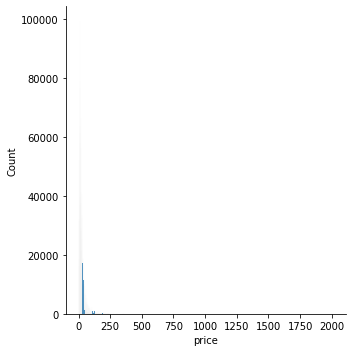

In [ ]:
# 데이터 분포도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.displot(y_train_df, kde=False) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


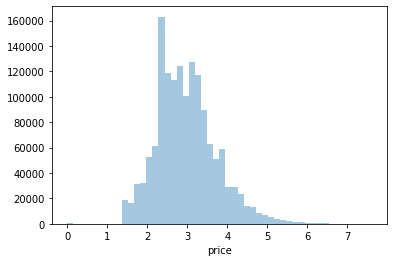

In [ ]:
# 로그변환
import numpy as np
y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [ ]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [ ]:
print('Shippig 값 유형:\n', mercari_df['shipping'].value_counts())
# 배송비유무, 값이 비교적 균일
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())
# 주로 1,2,3

Shippig 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [ ]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [ ]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']

# split_cat()을 apply lamba에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']= zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :', mercari_df['cat_jung'].nunique()) #??
print('소분류 개수 :', mercari_df['cat_so'].nunique()) 

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : 114
소분류 개수 : 871


In [ ]:
# Null값 'Other_Null'로 변경
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 칼럼별로 Null 값 건수 확인, 모두 0이 나와야 함
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화
- 선형회귀모델은 모두 원-핫 인코딩 적용
- 짧은 텍스트는 Count 기반 벡터화, 긴 텍스트는 TD-IFD 기반 벡터화 적용

 - cat_dae, cat_jung, cat_so 칼럼 원-핫 인코딩
 - shipping, item_condition_id 칼럼 원-핫 인코딩

In [ ]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])
## 원-핫 인코딩 진행

brand name의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [ ]:
print('name의 유형 건수 :', mercari_df['name'].nunique())
print('name sample 10건 : \n', mercari_df['name'][:10])
# 개별적으로 거의 고유한 상품명, 적은 단어 위주의 텍스트 형태
## 피처 벡터화 변환 적용

name의 유형 건수 : 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [ ]:
pd.set_option('max_colwidth', 200)
# item_description의 평균 문자열 크기
print('item_description의 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())
mercari_df['item_description'][:2]
## TF-IDF 변환 적용

item_description의 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [ ]:
## 주요 칼럼 인코딩 및 피처 벡터화 변환

# name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape (1482535, 50000)


- CountVectorizer, TfidfVectorizer는 모두 희소 행렬 형태 반환
- X_name과 X_descp 결합해 새로운 데이터 세트로 구성, 인코딩될 칼럼들과 함께 결합해 ML 모델을 실행하는 기반 데이터 세트로 재구성
 - LabelBinarizer 클래스는 sparse_out=True 파라미터 설정을 통해 희소 행렬 형태의 원-핫 인코딩 변환 지원
 - 사이파이 패키지 sparse 모듈의 hstack() 함수 : 희소 행렬을 칼럼레벨로 결함

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae  = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so  = lb_cat_so.fit_transform(mercari_df['cat_so'])

print(type(X_brand), type(X_item_cond_id), type(X_shipping)) # CSR??
print('X_brand shape:[0], X_item_cond_id shape:[1]'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:[0], X_cat_dae shape:[1]'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:[0], X_cat_so shape:[1]'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:[0], X_item_cond_id shape:[1]
X_shipping shape:[0], X_cat_dae shape:[1]
X_cat_jung shape:[0], X_cat_so shape:[1]


In [ ]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터의 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


367

### 릿지 회귀 모델 구축 및 평가

In [ ]:
# 평가 로직 함수화

def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해 ㅣog아닌 ㅣog1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    
    # 워보 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 rmsle값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [ ]:
# 학습용 데이터 생성 및 모델 학습/예측 로직 함수화

import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()
    
    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [ ]:
linear_model = Ridge(solver="lsqr", fit_intercept=False)
sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 떄 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

# Item Description 포함시 rmsle가 많이 감소 -> 영향이 큼

Item Description을 제외했을 떄 rmsle 값: 0.5023727038010556
Item Description을 포함한 rmsle 값: 0.47121951434336345


### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가
- 릿지 모델 예측값과 lightGBM 모델 예측값을 앙상블 방식으로 섞어서 최종 회귀 예측값 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

LightGBM rmsle 값: 0.4571958024426099


In [ ]:
# 앙상블 (배합 비율 임의 산정)
preds = lgbm_preds*0.45 + linear_preds*0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45072592143293


## 11. 정리
- 머신러닝 기반의 텍스트 분석 프로세스:
 1. 텍스트 사전 정제 작업 등의 텍스트 정규화 작업
 2. 단어들을 피처 벡터화로 변환
 3. 피처 데이터 세트에 머신러닝 모델 학습하고 예측, 평가
- 텍스트 정규화 작업 : 텍스트 클렌징 및 대소문자 변경, 단어 토큰화, 의미없는 단어 필터링, 어근 추출 등
- 일반적으로 문장이 긴 경우 TF-IDF 기반의 피처 벡터가 더 정확한 결과 도출에 도움이 됨 (희소 행렬 도출)